## 💡 IDEA
Validatore: classificatore in cascata sulla famiglia/su altri tratti utili ~adversarial

In [6]:
from train_grape import get_args, main, load_data
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_X = pd.read_csv('../processed_features_num.csv', index_col=0)
df_X = df_X.drop(columns=[c for c in df_X.columns if c.endswith('_isabsent') or c.endswith('_w')])

df_X = df_X.reset_index(drop=True)
df_X_cat = df_X.Family
df_X = df_X.drop(columns=['Family']).T.reset_index(drop=True).T

df_filtered = df_X.copy()
q = df_X.quantile(.9)
df_filtered[df_filtered > q] = np.nan

**Problem:** seems to drop to much

In [25]:
args = get_args("--cross_val")
args.log_path = Path(f'./nzspecies/test/{args.split}/')
data = load_data(args)

Columns to drop (thr: 0.7): Index(['CalyxSize_l', 'CorollaSize_l', 'DiskFloretSize_l', 'Glumes_l', 'Lemma',
       'LobesSize_l', 'Lodicules_l', 'OvarySize_l', 'Palea', 'PappusSize',
       'PedicelSize_l', 'PetalSize_l', 'RayFloretsSize_l', 'SepalSize_l',
       'StamenSize_l', 'StigmaSize_l', 'StyleSize_l', 'TubeSize_l',
       'UtricleSize_l'],
      dtype='object')


<Axes: xlabel='variable', ylabel='value'>

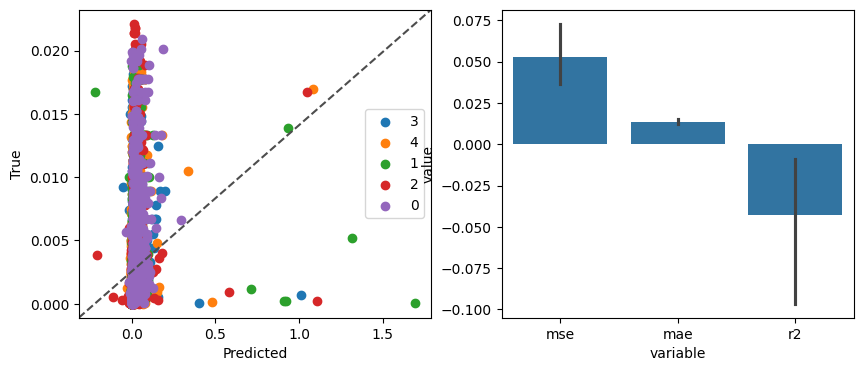

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


quantile = .85
rs = []
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for split in Path(f'./nzspecies/soft_del/').glob('*/'):
	# args = get_args(f"--cross_val --split {split.name}")
	# args.log_path = Path(f'./nzspecies/test/{args.split}/')
	# data = load_data(args)
	# test_edges = eval((args.log_path / 'unknown_edges.txt').read_text())

	try:
		with open(split / 'result.pkl', 'rb') as f:
			result = pickle.load(f)
	except:
		continue
	outputs = result['outputs']
	upbound = np.quantile(result['outputs']['label_test'], quantile)
	qmask = result['outputs']['label_test'] < upbound
	gt = result['outputs']['label_test'][qmask]
	pred = result['outputs']['final_pred_test'][qmask]

	mse = mean_squared_error(pred, gt)
	mae = mean_absolute_error(pred, gt)
	r2 = r2_score(pred, gt)
	rs.append({'k':int(split.name), 'mse': np.sqrt(mse), 'mae': mae, 'r2': r2})
	ax[0].scatter(pred, gt, label=split.name)

ax[0].legend()
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, ls="--", c=".3")
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

pd.DataFrame(rs).melt(id_vars='k').pipe(sns.barplot, y='value', x='variable', ax=ax[1])


<Axes: xlabel='variable', ylabel='value'>

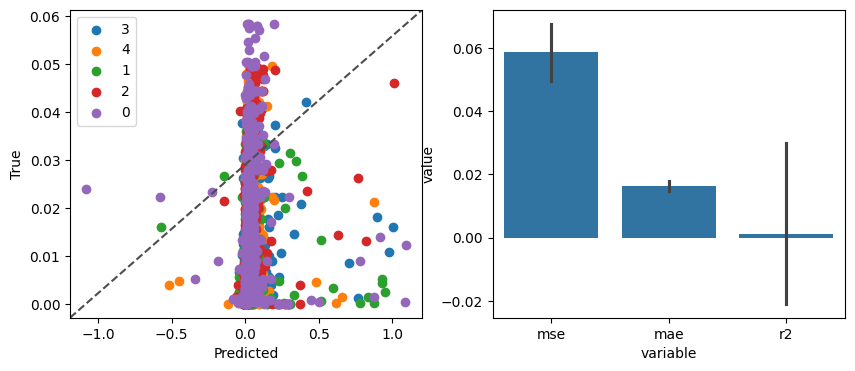

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

quantile = .85
rs = []
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for split in Path(f'./nzspecies/test/').glob('*/'):
	# args = get_args(f"--cross_val --split {split.name}")
	# args.log_path = Path(f'./nzspecies/test/{args.split}/')
	# data = load_data(args)
	# test_edges = eval((args.log_path / 'unknown_edges.txt').read_text())

	try:
		with open(split / 'result.pkl', 'rb') as f:
			result = pickle.load(f)
	except:
		continue
	outputs = result['outputs']
	upbound = np.quantile(result['outputs']['label_test'], quantile)
	qmask = result['outputs']['label_test'] < upbound
	gt = result['outputs']['label_test'][qmask]
	pred = result['outputs']['final_pred_test'][qmask]

	mse = mean_squared_error(pred, gt)
	mae = mean_absolute_error(pred, gt)
	r2 = r2_score(pred, gt)
	rs.append({'k':int(split.name), 'mse': np.sqrt(mse), 'mae': mae, 'r2': r2})
	ax[0].scatter(pred, gt, label=split.name)

ax[0].legend()
ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, ls="--", c=".3")
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

pd.DataFrame(rs).melt(id_vars='k').pipe(sns.barplot, y='value', x='variable', ax=ax[1])
